# KNIT6
#### Measurement Framework Library
# MFLib API Examples: Accessing ELK Logs & Metrics


## Prerequisites
The slice has to have already been instrumentized. See the [Instrumentize a Slice](./KNIT6_instrumentize_a_slice.ipynb) notebook.

## Imports
This series of notebooks all need a common set of imports which are defined in [Common Imports](./KNIT6_common_imports.ipynb)

**slice_name** is defined in this step. If you would like to change the slice_name, edit [Common Imports](./KNIT6_common_imports.ipynb)

In [ ]:
%run "./KNIT6_common_imports.ipynb"

## Set Experiment Slice Name

#### If you are using the slice created in the Instrumentize a Slice notebook, you will have this instrumentized topology.

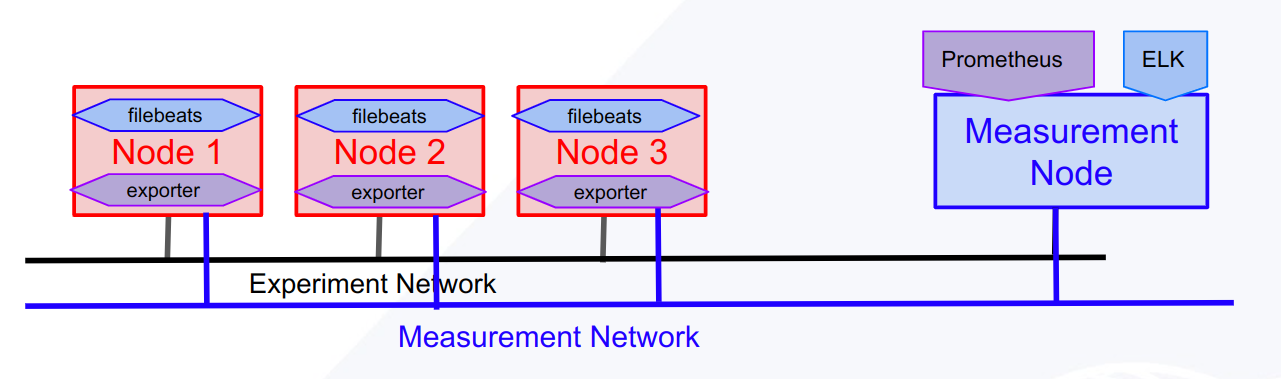

## Create the MFLib Object
Create the new MFLib object by passing in the name of the slice with which you will be interacting.
This will take a few seconds. 
Note: If the slice has not been previously initialized and instrumentized then this step will attempt to initialize the slice. That will take ~ 5 minutes. However, as of this writing, if the slice is not instrumentized, instrumentize will not be performed.

In [ ]:
mf = MFLib(slice_name)

# ELK

Elk consists of 3 basic parts:
* Elastic Search database running on the Measurement Node.
* Filebeats have been installed on the experiment nodes to push data to Elastic Search.
* Kibana has been installed on the Measurement Node and provides a web GUI to visualize the gathered metrics and logs.


## Get Kibana Access Info
To access the ELK data go to the Kibana interface.   
From your local machine, you will have to tunnel through the bastion host into the measurement node. 

If you have downloaded and extracted the `fabric_ssh_tunnel_tools.tgz` to your local machine open a terminal/command window in that directory and paste the results of `mf.kibana_tunnel` to create the SSH tunnel.  
Otherwise you will need to create the tunnel command similar to:
`ssh -L <local-port>:localhost:443 -F <fabric-ssh-config-file> -i <your portal_slice_id_rsa-file> <slice-username>@<meas_node-ip>` Note that local port defaults to 10020 for the kibana tunnel.



In [ ]:
# The ELK service was created by the mf.instrumentize call.
# Get access info for Kibana by using the mflib.info call to the elk service.
# Create a dictionary to pass to the service.
data = {}
# Set the info you want to get.
data["get"] = ["nginx_id", "nginx_password"]
# Call info using service name and data dictionary.
info_results = mf.info("elk", data)
print(info_results)

if info_results["success"]:
    print(f"user: {info_results['nginx_id']} \npass: {info_results['nginx_password']}")

In [ ]:
# ELK SSH Tunnel Command
# mf.kibana_tunnel_local_port = 10020 # optionally change the port
print(mf.kibana_tunnel)

print(f"Browse to http://localhost:{mf.kibana_tunnel_local_port}/")

Browse to [http://localhost:10020](http://localhost:10020) or  for dashboard listing browse to [http://localhost:10020/app/dashboards](http://localhost:10020/app/dashboards)
You will need to type in the ht_access username and password. See below.

In [ ]:
# A direct link to the overview of filebeat dashboard. 
print(f"    http://localhost:{mf.kibana_tunnel_local_port}/app/dashboards#/view/Filebeat-syslog-dashboard-ecs")

### Upload Custom Kibana Dashboards

Browse to the link printed below to see the list of dashboards already available in Kibana.

In [ ]:
print(f"Browse to http://localhost:{mf.kibana_tunnel_local_port}/app/dashboards/")

After uploading dashboards, refresh the above link to see the newly uploaded dashboards.

Upload a single dashboard.

In [ ]:
data = {}
data["commands"] = []

# Add upload_dashboards command along with dashboard filenames to upload.
data["commands"].append( {"cmd":"upload_dashboards", "dashboard_filenames":["FABRICDashboards.ndjson"]} )

# Add add_dashboards command along with dashboard filenames to add.
data["commands"].append({"cmd":"add_dashboards", "dashboard_filenames":["FABRICDashboards.ndjson"] } )

# Add list of files to upload to the Measurement Node.
files = ["./dashboard_examples/kibana/FABRICDashboards.ndjson"]

# Call update
results = mf.update("elk", data, files)
print(results)

Upload a directory of dashboards.

In [ ]:
# Array to be filled with full paths of all dashboard files in dashboards_folder directory
dashboard_filenames = [] 
dashboards_folder = "./dashboard_examples/kibana/"

# Loop through dashboards folder
for file in os.listdir(dashboards_folder):
    # Only upload dashboard files 
    if file.endswith(".ndjson"): 
        # Add full path of dashboard to array
        dashboard_filenames.append(os.path.join(dashboards_folder, file)) 

# Build update command.
data = {}
data["commands"] = []

# Add upload_dashboards command along with dashboard filenames to upload.
data["commands"].append( {"cmd":"upload_dashboards", "dashboard_filenames":dashboard_filenames})

# Add add_dashboards command along with dashboard filenames to add.
data["commands"].append( {"cmd":"add_dashboards", "dashboard_filenames":dashboard_filenames})

# Call update
dashboard_results = mf.update("elk", data, dashboard_filenames)
print(dashboard_results)

For more avaialable dashboards see [mf-dashboards on GitHub](https://github.com/fabric-testbed/mf-dashboards).